## Part 2: Exploratory Data Analysis

In this EDA section, we will be doing the following steps:
1. Load, merge, and preview data
2. Check total number of entries and column types
3. Check for duplicate and null values
4. Clean up column names and data types
5. Plot count distribution of categorical data
6. Plot distribution of numeric data
7. Change non numeric data to numeric
8. Drop columns that are not relevant to prediction

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Load, merge, and preview data

In [115]:
# Load different types of collision dataset csv files, downloaded from data.torontopolice.on.ca
df_pedestrian = pd.read_csv('data/Pedestrians.csv')
df_cyclists = pd.read_csv('data/Cyclists.csv')
df_truck = pd.read_csv('data/Truck.csv')
df_emergency = pd.read_csv('data/Emergency_Vehicle.csv')
df_fatal = pd.read_csv('data/Fatal.csv')
df_redlight = pd.read_csv('data/Red_Light.csv')

In [116]:
dfs = [df_cyclists, df_pedestrian, df_truck, df_emergency, df_fatal, df_redlight]

All datasets above have same columns and shapes, so we can safely merge them to a big table.

In [117]:
# Merge dataframes if all of them have same column names
if (all([len(dfs[0].columns.intersection(df.columns)) == dfs[0].shape[1] for df in dfs])):
    df = pd.concat(dfs)
else: print('Not able to merge dataframes that have different column names.')

In [118]:
# Read in red light camera location data that was saved in section 1
df_rlc = pd.read_csv('data/rlc.csv')

In [119]:
df_rlc.head()

,location
0,ADELAIDE ST E&PARLIAMENT ST
1,ALBION RD&KIPLING AVE
2,ALBION RD&SILVERSTONE DR
3,AVENUE RD&LAWRENCE AVE W
4,BATHURST ST&DAVENPORT RD


In [120]:
# Create a new column 'has_rlc' in collision df if street 1 and street 2 on both df matches
df['has_rlc'] = np.where((df['STREET1'] + '&' + df['STREET2']).isin(df_rlc['location'])
                         | (df['STREET2'] + '&' + df['STREET1']).isin(df_rlc['location']),
                         1, 0)

In [121]:
df.shape

(11328, 57)

In [122]:
# One accident may appear in different datasets, we want to use 'ACCNUM' as Unique Identifier to only keep one
df = df.drop_duplicates(subset=['ACCNUM'], keep='first')

#### 2. Check data info

In [123]:
# Check the shape
df.shape

(3857, 57)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3857 entries, 0 to 1356
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              3857 non-null   float64
 1   Y              3857 non-null   float64
 2   Index_         3857 non-null   int64  
 3   ACCNUM         3857 non-null   int64  
 4   YEAR           3857 non-null   int64  
 5   DATE           3857 non-null   object 
 6   TIME           3857 non-null   int64  
 7   HOUR           3857 non-null   int64  
 8   STREET1        3857 non-null   object 
 9   STREET2        3523 non-null   object 
 10  OFFSET         543 non-null    object 
 11  ROAD_CLASS     3820 non-null   object 
 12  District       3854 non-null   object 
 13  WardNum        3288 non-null   float64
 14  Division       3857 non-null   int64  
 15  LATITUDE       3857 non-null   float64
 16  LONGITUDE      3857 non-null   float64
 17  LOCCOORD       3836 non-null   object 
 18  ACCLOC  

In [125]:
df.describe()

,X,Y,Index_,ACCNUM,YEAR,TIME,HOUR,WardNum,Division,LATITUDE,LONGITUDE,FATAL_NO,Hood_ID,ObjectId,has_rlc
count,3.857000e+03,3.857000e+03,3.857000e+03,3.857000e+03,3857.000000,3857.000000,3857.000000,3288.000000,3857.000000,3857.000000,3857.000000,344.000000,3857.000000,3857.000000,3857.000000
mean,-8.838103e+06,5.420441e+06,3.527099e+07,2.561484e+09,2012.275084,1364.217786,13.443090,12.106448,34.523982,43.708468,-79.394034,30.540698,75.358828,2427.767177,0.056780
std,1.098229e+04,8.547060e+03,3.659781e+07,3.365367e+09,4.038814,613.684700,5.990608,6.979451,14.934070,0.055492,0.098656,18.451847,39.541614,1993.129746,0.231452
min,-8.864891e+06,5.402622e+06,3.363207e+06,8.820240e+05,2006.000000,0.000000,0.000000,1.000000,11.000000,43.592673,-79.634670,1.000000,1.000000,1.000000,0.000000
25%,-8.845026e+06,5.413076e+06,5.394362e+06,1.106355e+06,2009.000000,915.000000,9.000000,6.000000,22.000000,43.660645,-79.456218,15.000000,43.000000,685.000000,0.000000
50%,-8.838288e+06,5.418801e+06,7.516243e+06,1.320584e+06,2012.000000,1445.000000,14.000000,11.000000,33.000000,43.697845,-79.395690,29.000000,77.000000,1652.000000,0.000000
75%,-8.830206e+06,5.427644e+06,8.056665e+07,6.000853e+09,2016.000000,1850.000000,18.000000,18.000000,51.000000,43.755245,-79.323090,45.000000,110.000000,4173.000000,0.000000
max,-8.808254e+06,5.442070e+06,8.135647e+07,9.002500e+09,2019.000000,2359.000000,23.000000,25.000000,55.000000,43.848780,-79.125896,76.000000,140.000000,6482.000000,1.000000


#### 3. Check for duplicates and null values

In [126]:
# Check duplicates
df.duplicated().sum()

0

In [127]:
# Check null values
print(f'There are total of {df.isna().sum().sum()} null values in the dataframe')
df.isna().sum(axis=0)

There are total of 76095 null values in the dataframe


X                   0
Y                   0
Index_              0
ACCNUM              0
YEAR                0
DATE                0
TIME                0
HOUR                0
STREET1             0
STREET2           334
OFFSET           3314
ROAD_CLASS         37
District            3
WardNum           569
Division            0
LATITUDE            0
LONGITUDE           0
LOCCOORD           21
ACCLOC           1159
TRAFFCTL            3
VISIBILITY         10
LIGHT               0
RDSFCOND           11
ACCLASS             0
IMPACTYPE           1
INVTYPE             5
INVAGE              0
INJURY            559
FATAL_NO         3513
INITDIR           872
VEHTYPE           334
MANOEUVER        1147
DRIVACT          1360
DRIVCOND         1362
PEDTYPE          3517
PEDACT           3519
PEDCOND          3517
CYCLISTYPE       3733
CYCACT           3722
CYCCOND          3722
PEDESTRIAN       1313
CYCLIST          3150
AUTOMOBILE        486
MOTORCYCLE       3739
TRUCK            3558
TRSN_CITY_

In [128]:
# Dropping some columns that are not needed
df.drop(columns=['X','Y', 'Index_', 'OFFSET',
                 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
                 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
                 'CYCLIST', 'AUTOMOBILE', 'PASSENGER', 'MOTORCYCLE', 'TRUCK',
                 'TRSN_CITY_VEH', 'EMERG_VEH', 'Hood_ID', 'AG_DRIV', 'REDLIGHT',
                 'ALCOHOL', 'DISABILITY', 'ObjectId', 'ACCLOC', 'FATAL_NO', 'SPEEDING'], inplace=True)

In [129]:
# Check null values after dropping columns
print(f'There are total of {df.isna().sum().sum()} null values in the dataframe')
df.isna().sum(axis=0)

There are total of 8589 null values in the dataframe


ACCNUM              0
YEAR                0
DATE                0
TIME                0
HOUR                0
STREET1             0
STREET2           334
ROAD_CLASS         37
District            3
WardNum           569
Division            0
LATITUDE            0
LONGITUDE           0
LOCCOORD           21
TRAFFCTL            3
VISIBILITY         10
LIGHT               0
RDSFCOND           11
ACCLASS             0
IMPACTYPE           1
INVTYPE             5
INVAGE              0
INJURY            559
PEDTYPE          3517
PEDACT           3519
Neighbourhood       0
has_rlc             0
dtype: int64

In [130]:
# Look at District null rows
df[df['District'].isna()]

,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS,District,WardNum,...,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,PEDTYPE,PEDACT,Neighbourhood,has_rlc
1419,9001007644,2019,2019/06/01 04:00:00+00,1827,18,DUNDAS ST W,ANNETTE ST,Major Arterial,NaN,4.0,...,Dry,Non-Fatal Injury,Cyclist Collisions,Cyclist,15 to 19,Major,NaN,NaN,Junction Area (90),0
6055,9002258968,2019,2019/11/22 05:00:00+00,2321,23,ST CLAIR AVE W,CHRISTIE ST,Major Arterial,NaN,NaN,...,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,NaN,NaN,Wychwood (94),0
1284,7001372110,2017,2017/07/31 04:00:00+00,139,1,BATHURST ST,FINCH AVE W,Major Arterial,NaN,NaN,...,Dry,Non-Fatal Injury,Angle,Passenger,70 to 74,Major,NaN,NaN,Willowdale West (37),0


In [131]:
# Take a look at other rows with same street1 and street2 values
df.loc[(df['STREET1'] == 'DUNDAS ST W') & (df['STREET2'] == 'ANNETTE ST')]
df.loc[(df['STREET1'] == 'ST CLAIR AVE W') & (df['STREET2'] == 'CHRISTIE ST')]
df.loc[(df['STREET1'] == 'BATHURST ST') & (df['STREET2'] == 'FINCH AVE W')]

,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS,District,WardNum,...,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,PEDTYPE,PEDACT,Neighbourhood,has_rlc
3340,1369968,2013,2013/08/12 04:00:00+00,2055,20,BATHURST ST,FINCH AVE W,Major Arterial,North York,NaN,...,Dry,Non-Fatal Injury,Pedestrian Collisions,Vehicle Owner,unknown,NaN,NaN,NaN,Newtonbrook West (36),0
1284,7001372110,2017,2017/07/31 04:00:00+00,139,1,BATHURST ST,FINCH AVE W,Major Arterial,NaN,NaN,...,Dry,Non-Fatal Injury,Angle,Passenger,70 to 74,Major,NaN,NaN,Willowdale West (37),0


In [132]:
# Fill found district values
df.loc[6055, 'District'] = 'Toronto and East York'
df.loc[1284, 'District'] = 'North York'

In [133]:
# Drop some null rows
df.dropna(subset = ['ROAD_CLASS', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'District'], inplace=True)

In [134]:
# Check null values again
print(f'There are total of {df.isna().sum().sum()} null values in the dataframe')
df.isna().sum(axis=0)

There are total of 8324 null values in the dataframe


ACCNUM              0
YEAR                0
DATE                0
TIME                0
HOUR                0
STREET1             0
STREET2           326
ROAD_CLASS          0
District            0
WardNum           560
Division            0
LATITUDE            0
LONGITUDE           0
LOCCOORD            0
TRAFFCTL            0
VISIBILITY          0
LIGHT               0
RDSFCOND            0
ACCLASS             0
IMPACTYPE           0
INVTYPE             0
INVAGE              0
INJURY            551
PEDTYPE          3442
PEDACT           3445
Neighbourhood       0
has_rlc             0
dtype: int64

In [135]:
# Set INJURY to 0 if null or None, 1 for other cases
df.loc[df['INJURY'] == 'None', 'INJURY'] = 0
df['INJURY'].fillna(0, inplace=True)
df.loc[df['INJURY'] != 0, 'INJURY'] = 1

In [136]:
# Drop STREET1, STREET2 and WardNum
df.drop(columns=['STREET1', 'STREET2', 'WardNum'], inplace=True)

In [137]:
df.isna().sum(axis=0)

ACCNUM              0
YEAR                0
DATE                0
TIME                0
HOUR                0
ROAD_CLASS          0
District            0
Division            0
LATITUDE            0
LONGITUDE           0
LOCCOORD            0
TRAFFCTL            0
VISIBILITY          0
LIGHT               0
RDSFCOND            0
ACCLASS             0
IMPACTYPE           0
INVTYPE             0
INVAGE              0
INJURY              0
PEDTYPE          3442
PEDACT           3445
Neighbourhood       0
has_rlc             0
dtype: int64

In [138]:
# Look at top 5 PEDTYPE values
df['PEDTYPE'].value_counts().head(5)

Pedestrian hit at mid-block                                                       99
Vehicle turns left while ped crosses with ROW at inter.                           56
Vehicle is going straight thru inter.while ped cross without ROW                  52
Pedestrian involved in a collision with transit vehicle anywhere along roadway    25
Vehicle turns right while ped crosses with ROW at inter.                          24
Name: PEDTYPE, dtype: int64

In [139]:
# Look at top 3 PEDACT values
df['PEDACT'].value_counts().head(3)

Crossing with right of way       102
Crossing, no Traffic Control      97
Crossing without right of way     42
Name: PEDACT, dtype: int64

In [140]:
# PEDTYPE and PEDACT are not needed in model fitting, so dropping them
df.drop(columns=['PEDTYPE', 'PEDACT'], inplace=True)

In [141]:
# Check null values again
print(f'There are total of {df.isna().sum().sum()} null values in the dataframe')

There are total of 0 null values in the dataframe


In [142]:
# Check the shape after cleaning up null values
df.shape

(3778, 22)

#### 4. Clean up column names and data types

In [144]:
# Change column names to lower case
df.columns = df.columns.str.lower()

In [145]:
df.head(3)

,accnum,year,date,time,hour,road_class,district,division,latitude,longitude,...,visibility,light,rdsfcond,acclass,impactype,invtype,invage,injury,neighbourhood,has_rlc
0,891027,2006,2006/02/11 05:00:00+00,1804,18,Collector,North York,33,43.752745,-79.32639,...,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Driver,65 to 69,0,Parkwoods-Donalda (45),0
2,893580,2006,2006/02/27 05:00:00+00,1955,19,Major Arterial,Scarborough,43,43.770645,-79.18689,...,Clear,Dark,Wet,Non-Fatal Injury,Cyclist Collisions,Vehicle Owner,unknown,0,West Hill (136),0
5,894195,2006,2006/03/01 05:00:00+00,1110,11,Minor Arterial,Toronto and East York,54,43.688645,-79.35279,...,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,Driver,35 to 39,0,Broadview North (57),0


In [146]:
# Change all "Yes" to 1
# df.loc[:, 'pedestrian':'disability'] = df.loc[:, 'pedestrian':'disability'].replace(['Yes'], 1)

In [147]:
# Check data info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 0 to 1356
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   accnum         3778 non-null   int64  
 1   year           3778 non-null   int64  
 2   date           3778 non-null   object 
 3   time           3778 non-null   int64  
 4   hour           3778 non-null   int64  
 5   road_class     3778 non-null   object 
 6   district       3778 non-null   object 
 7   division       3778 non-null   int64  
 8   latitude       3778 non-null   float64
 9   longitude      3778 non-null   float64
 10  loccoord       3778 non-null   object 
 11  traffctl       3778 non-null   object 
 12  visibility     3778 non-null   object 
 13  light          3778 non-null   object 
 14  rdsfcond       3778 non-null   object 
 15  acclass        3778 non-null   object 
 16  impactype      3778 non-null   object 
 17  invtype        3778 non-null   object 
 18  invage  

#### 5. Plot count distribution of categorical data

-----------------------------------------------------------------------------


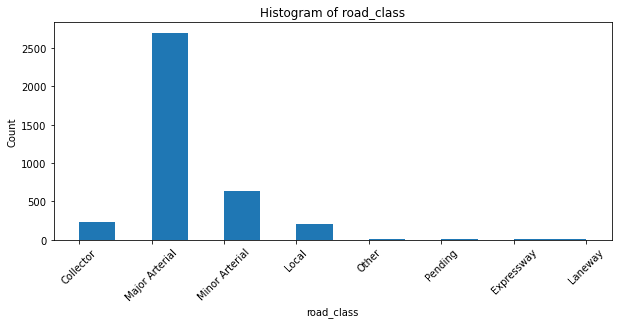

Major Arterial    2698
Minor Arterial     630
Collector          236
Local              199
Other                5
Name: road_class, dtype: int64

-----------------------------------------------------------------------------


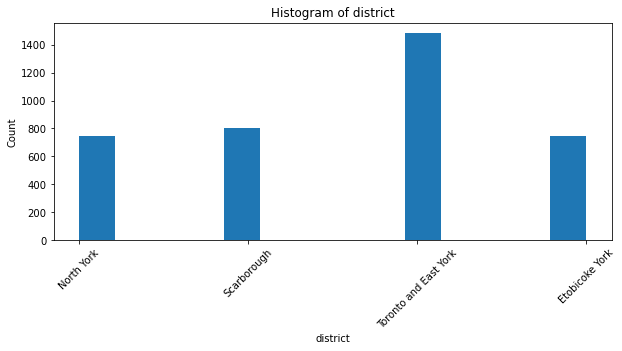

Toronto and East York    1481
Scarborough               805
North York                747
Etobicoke York            745
Name: district, dtype: int64

-----------------------------------------------------------------------------


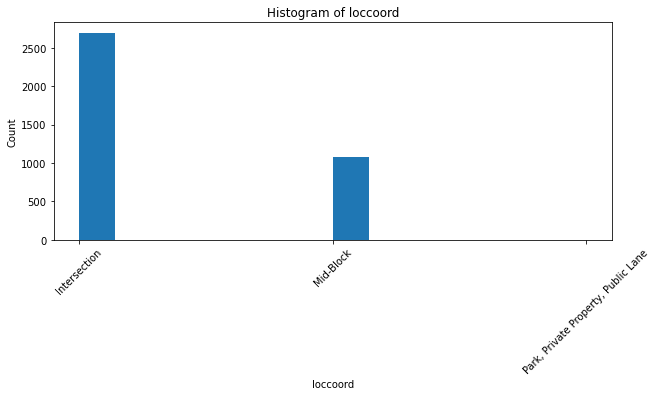

Intersection                           2696
Mid-Block                              1081
Park, Private Property, Public Lane       1
Name: loccoord, dtype: int64

-----------------------------------------------------------------------------


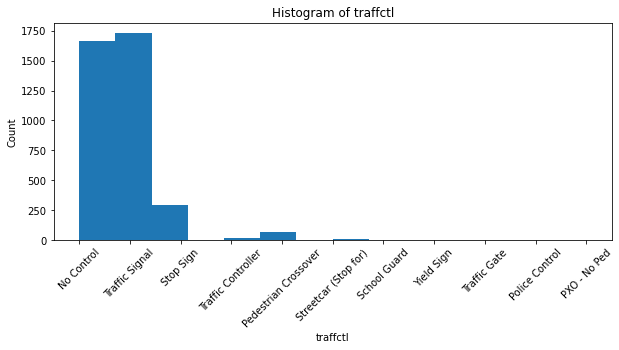

Traffic Signal          1729
No Control              1663
Stop Sign                290
Pedestrian Crossover      65
Traffic Controller        17
Name: traffctl, dtype: int64

-----------------------------------------------------------------------------


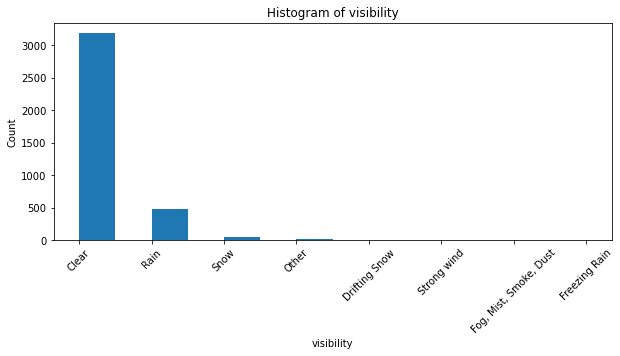

Clear                     3185
Rain                       487
Snow                        55
Other                       27
Fog, Mist, Smoke, Dust      10
Name: visibility, dtype: int64

-----------------------------------------------------------------------------


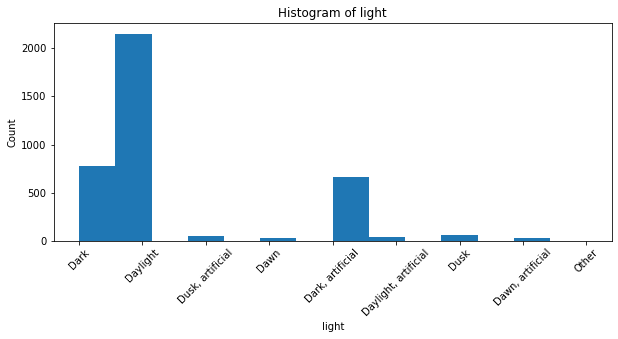

Daylight            2155
Dark                 772
Dark, artificial     662
Dusk                  57
Dusk, artificial      47
Name: light, dtype: int64

-----------------------------------------------------------------------------


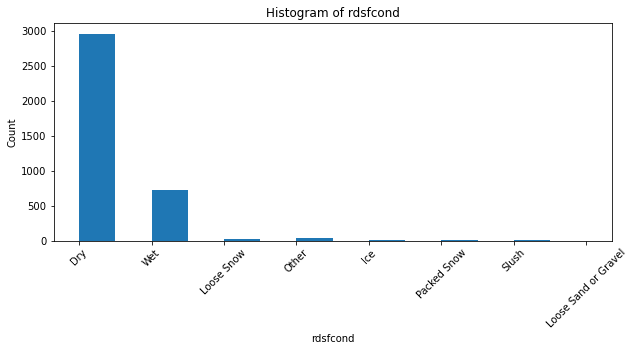

Dry           2961
Wet            728
Other           35
Loose Snow      22
Slush           15
Name: rdsfcond, dtype: int64

-----------------------------------------------------------------------------


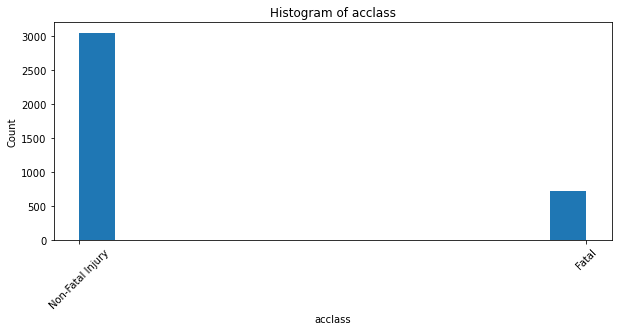

Non-Fatal Injury    3052
Fatal                726
Name: acclass, dtype: int64

-----------------------------------------------------------------------------


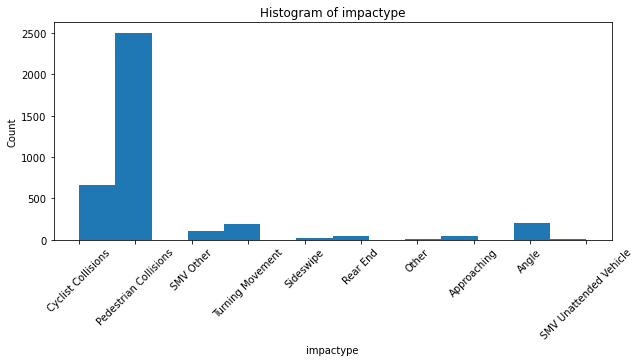

Pedestrian Collisions    2504
Cyclist Collisions        660
Angle                     198
Turning Movement          186
SMV Other                 102
Name: impactype, dtype: int64

-----------------------------------------------------------------------------


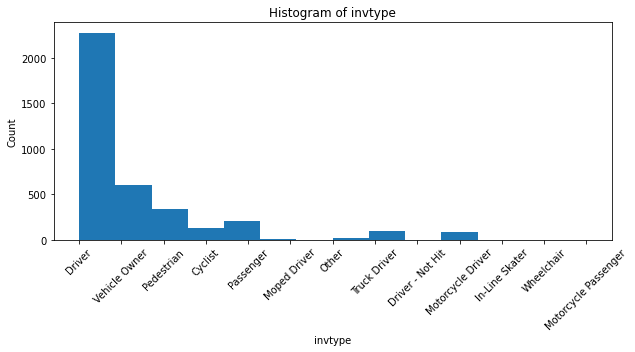

Driver           2277
Vehicle Owner     599
Pedestrian        337
Passenger         206
Cyclist           134
Name: invtype, dtype: int64

-----------------------------------------------------------------------------


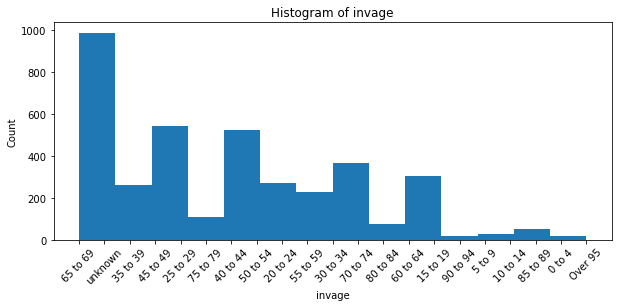

unknown     830
50 to 54    283
25 to 29    279
20 to 24    269
45 to 49    264
Name: invage, dtype: int64

-----------------------------------------------------------------------------


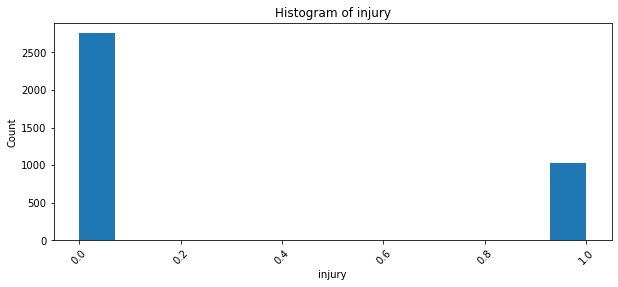

0    2752
1    1026
Name: injury, dtype: int64

In [149]:
list = ['road_class', 'district', 'loccoord', 'traffctl', 'visibility', 'light',
        'rdsfcond', 'acclass', 'impactype', 'invtype', 'invage', 'injury']

for col in list:
    print('-----------------------------------------------------------------------------')
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)
    plt.show()
    display(df[col].value_counts(sort=True, ascending=False).head(5))

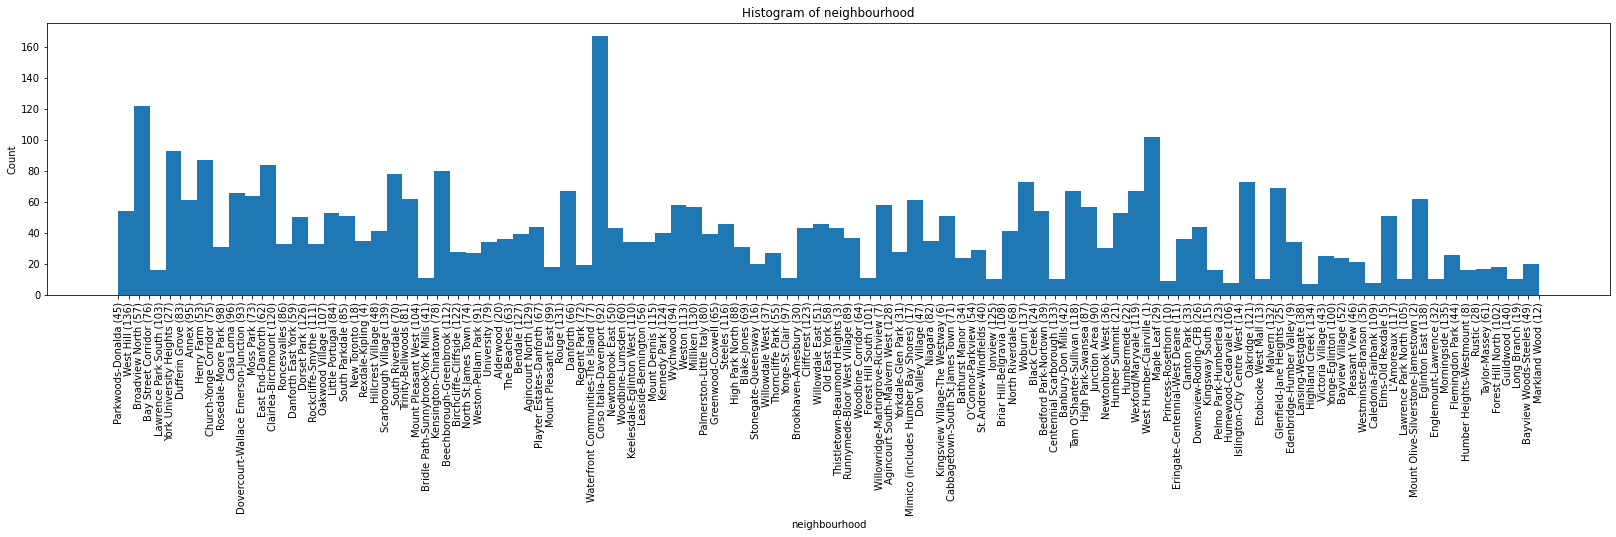

Waterfront Communities-The Island (77)    140
Bay Street Corridor (76)                  113
West Humber-Clairville (1)                 97
Name: neighbourhood, dtype: int64

In [156]:
# Visualize the distribution of road_class
plt.figure(figsize=(28, 5))
plt.hist(df['neighbourhood'], bins=90)
plt.xlabel('neighbourhood')
plt.ylabel('Count')
plt.title('Histogram of neighbourhood')
plt.xticks(rotation=90)
plt.show()
display(df['neighbourhood'].value_counts(sort=True, ascending=False).head(3))

#### 6. Plot distribution of numeric data

In [79]:
# Take a look at all numeric columns
df.select_dtypes([np.number]).columns

Index(['accnum', 'year', 'time', 'hour', 'division', 'latitude', 'longitude',
       'has_rlc'],
      dtype='object')

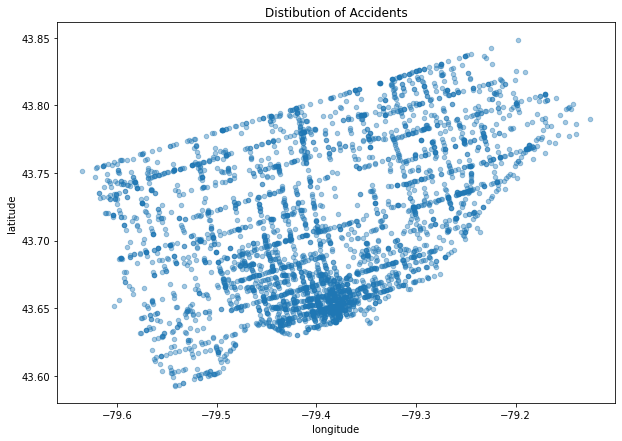

In [80]:
# Look at the latitude and longitude map first
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7))
plt.title('Distibution of Accidents')
plt.show()

In [81]:
# Columns in list 1 contain different numbers
num_list1 = ['year', 'hour', 'division']

# Columns in list 2 contain 0s and 1s
num_list2 = ['has_rlc']

-----------------------------------------------------------------------


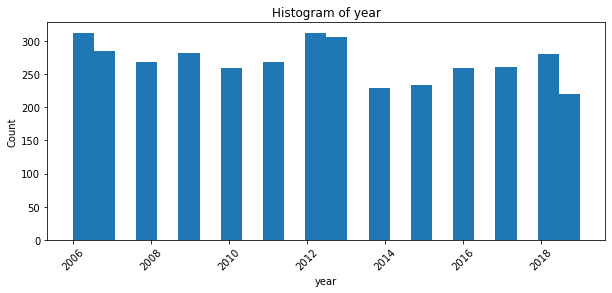

2012    313
2006    312
2013    306
2007    285
2009    282
Name: year, dtype: int64

-----------------------------------------------------------------------


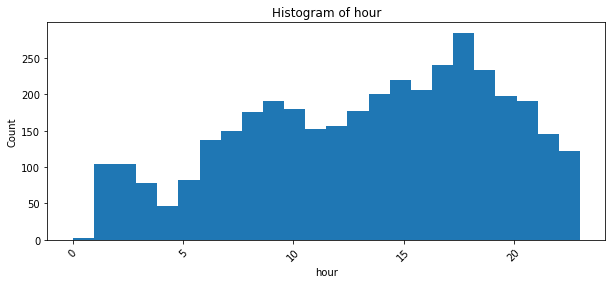

18    285
17    240
19    234
15    220
16    206
Name: hour, dtype: int64

-----------------------------------------------------------------------


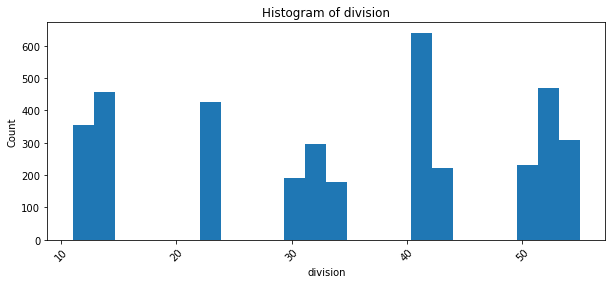

42    358
32    297
41    283
14    279
52    239
Name: division, dtype: int64

In [111]:
for col in num_list1:
    print('-----------------------------------------------------------------------')
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins=24)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)
    plt.show()
    display(df[col].value_counts(sort=True, ascending=False).head(5))

-------------------------------------------
COLUMN: has_rlc
n nulls: 0


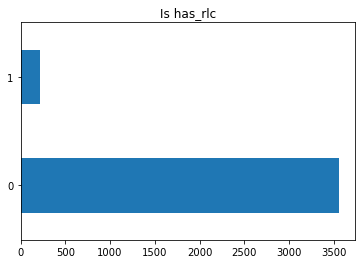

0    3561
1     217
Name: has_rlc, dtype: int64

In [161]:
for col in num_list2:
    print('-------------------------------------------')
    print('COLUMN:', col)
    print('n nulls:', df[col].isna().sum())
    
    # Viz the value counts
    df[col].value_counts().plot(kind='barh')
    plt.title(f'Is {col}')
    plt.show()
    
    display(df[col].value_counts(sort=True, ascending=False))
    print('\n')

#### 7. Change non numeric data to numeric

In [162]:
# for road_class column, create a new column called is_major_arterial, 1 if major, 0 for others
df['is_major_arterial'] = np.where(df['road_class'] == 'Major Arterial', 1, 0)

# drop is_major_arterial
df.drop(columns=['road_class'], inplace=True)

In [163]:
# for loccoord, create a new column called is_intersection, 1 if intersection, 0 for others
df['is_intersection'] = np.where(df['loccoord'] == 'intersection', 1, 0)
# df['is_mid_block'] = np.where(df['loccoord'] == 'Mid-Block', 1, 0)

# drop loccoord
df.drop(columns=['loccoord'], inplace=True)

In [164]:
# for traffctl column, create a new column called has_traffctl, 0 if No Control, 1 for others
df['has_traffctl'] = np.where(df['traffctl'] == 'No Control', 0, 1)

# drop traffctl
df.drop(columns=['traffctl'], inplace=True)

In [165]:
# for visibility column, create a new column called good_visibility, 1 if clear, 0 for others
df['good_visibility'] = np.where(df['visibility'] == 'Clear', 1, 0)

# drop visibility
df.drop(columns=['visibility'], inplace=True)

In [166]:
# for light column, create a new column called good_light, 1 if Daylight, 0 for others
df['good_light'] = np.where(df['light'] == 'Daylight', 1, 0)

# drop light
df.drop(columns=['light'], inplace=True)

In [167]:
# for rdsfcond column, create a new column called is_dry, 1 if Dry, 0 for others
df['is_dry'] = np.where(df['rdsfcond'] == 'Dry', 1, 0)

# drop rdsfcond
df.drop(columns=['rdsfcond'], inplace=True)

In [168]:
# for invtype column, create a new column called pedestrian_involved, 1 if is pedestrian, 0 for others
df['pedestrian_accident'] = np.where(df['impactype'] == 'Pedestrian Collisions', 1, 0)

# drop invtype
df.drop(columns=['impactype'], inplace=True)

In [169]:
# create day_of_week column based on date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='ignore')
df['day_of_week'] = df['date'].dt.dayofweek

In [170]:
# create day and day_of_year based on date
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear

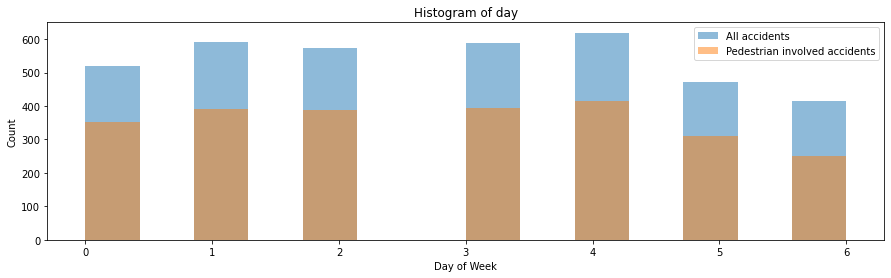

4    619
1    590
3    589
Name: day_of_week, dtype: int64

In [183]:
# Visualize the distribution of day of week
plt.figure(figsize=(15, 4))
plt.hist(df['day_of_week'], bins=14, label='All accidents', alpha=0.5)
plt.hist(df['day_of_week'].loc[df['pedestrian_accident'] == 1], bins=14, label='Pedestrian involved accidents', alpha=0.5)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Histogram of day')
plt.legend(loc='best')
plt.show()
display(df['day_of_week'].value_counts(sort=True, ascending=False).head(3))

In [172]:
# create month column based on date
df['month'] = pd.DatetimeIndex(df['date']).month

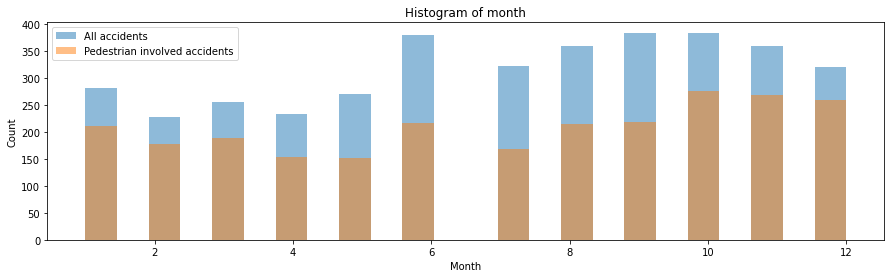

9     384
10    383
6     380
Name: month, dtype: int64

In [185]:
# Visualize the distribution of month
plt.figure(figsize=(15, 4))
plt.hist(df['month'], bins=24, label='All accidents', alpha=0.5)
plt.hist(df['month'].loc[df['pedestrian_accident'] == 1], bins=24, label='Pedestrian involved accidents', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Histogram of month')
plt.legend(loc='best')
plt.show()
display(df['month'].value_counts(sort=True, ascending=False).head(3))

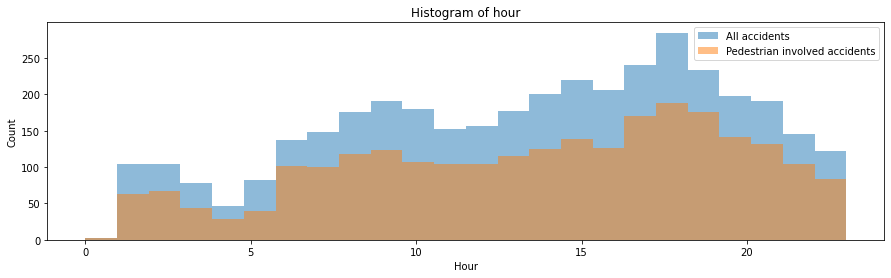

18    285
17    240
19    234
Name: hour, dtype: int64

In [211]:
# Visualize the distribution of hour
plt.figure(figsize=(15, 4))
plt.hist(df['hour'], bins=24, label='All accidents', alpha=0.5)
plt.hist(df['hour'].loc[df['pedestrian_accident'] == 1], bins=24, label='Pedestrian involved accidents', alpha=0.5)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Histogram of hour')
plt.legend(loc='best')
plt.show()
display(df['hour'].value_counts(sort=True, ascending=False).head(3))

In [186]:
# Put neighbourhood ids into a seperate column
df['neighbourhood_id'] = df['neighbourhood'].str.extract(r"\((\d+)\)", expand=False)
df['neighbourhood_id'].astype(int)

0        45
2       136
5        57
7        76
9       103
       ... 
1332     43
1335    116
1341     39
1348    130
1356     32
Name: neighbourhood_id, Length: 3778, dtype: int32

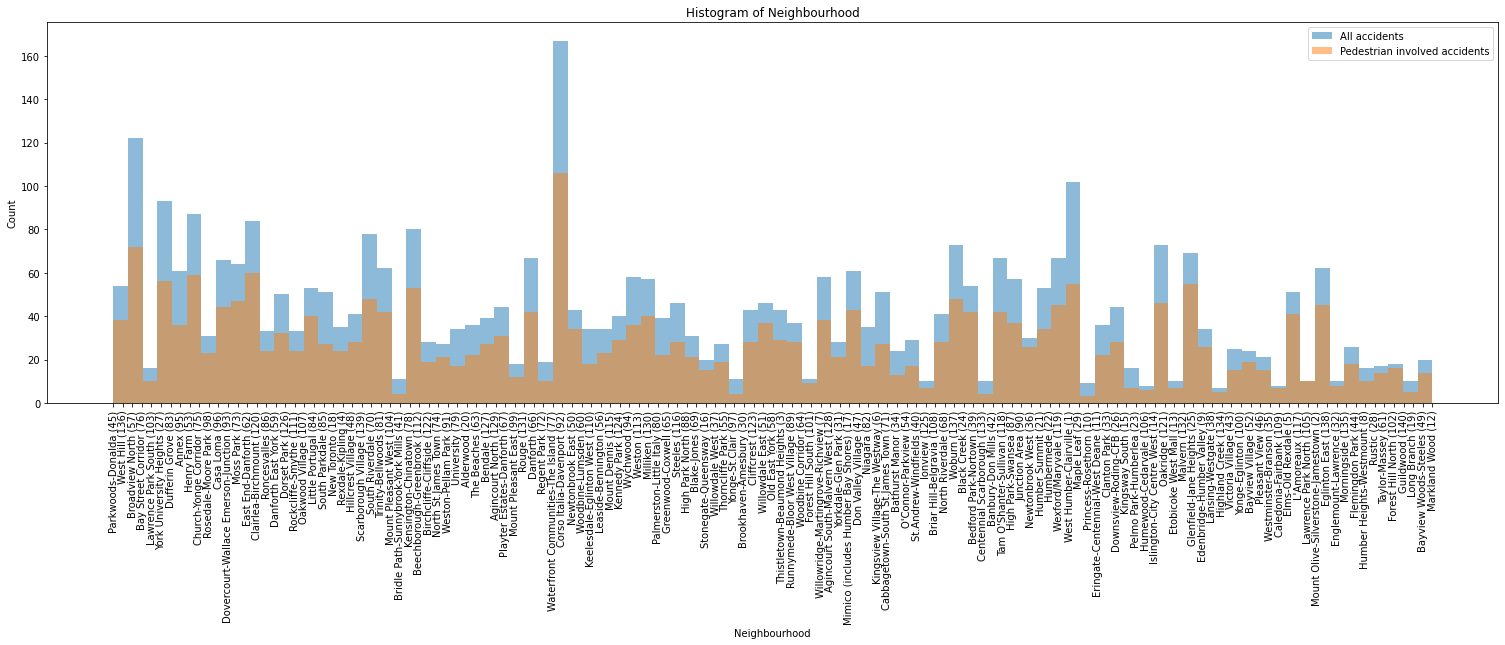

Waterfront Communities-The Island (77)    140
Bay Street Corridor (76)                  113
West Humber-Clairville (1)                 97
Name: neighbourhood, dtype: int64

In [212]:
# Visualize the distribution of neighbourhood id
plt.figure(figsize=(26, 7))
plt.hist(df['neighbourhood'], bins=90, label='All accidents', alpha=0.5)
plt.hist(df['neighbourhood'].loc[df['pedestrian_accident'] == 1], bins=90, label='Pedestrian involved accidents', alpha=0.5)
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Histogram of Neighbourhood')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()
display(df['neighbourhood'].value_counts(sort=True, ascending=False).head(3))

In [57]:
# Check the shape again
df.shape

(3778, 27)

#### 8. Drop columns that are not relevant to prediction

In [58]:
# Take a look at info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 0 to 1356
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   accnum               3778 non-null   int64              
 1   year                 3778 non-null   int64              
 2   date                 3778 non-null   datetime64[ns, UTC]
 3   time                 3778 non-null   int64              
 4   hour                 3778 non-null   int64              
 5   district             3778 non-null   object             
 6   division             3778 non-null   int64              
 7   latitude             3778 non-null   float64            
 8   longitude            3778 non-null   float64            
 9   acclass              3778 non-null   object             
 10  invtype              3778 non-null   object             
 11  invage               3778 non-null   object             
 12  injury              

In [59]:
df.head(5)

,accnum,year,date,time,hour,district,division,latitude,longitude,acclass,...,has_traffctl,good_visibility,good_light,is_dry,pedestrian_accident,day_of_week,day,day_of_year,month,neighbourhood_id
0,891027,2006,2006-02-11 05:00:00+00:00,1804,18,North York,33,43.752745,-79.32639,Non-Fatal Injury,...,0,1,0,1,0,5,11,42,2,45
2,893580,2006,2006-02-27 05:00:00+00:00,1955,19,Scarborough,43,43.770645,-79.18689,Non-Fatal Injury,...,1,1,0,0,0,0,27,58,2,136
5,894195,2006,2006-03-01 05:00:00+00:00,1110,11,Toronto and East York,54,43.688645,-79.35279,Non-Fatal Injury,...,0,1,1,1,0,2,1,60,3,57
7,899910,2006,2006-04-06 04:00:00+00:00,1540,15,Toronto and East York,52,43.658545,-79.38489,Non-Fatal Injury,...,1,1,1,1,0,3,6,96,4,76
9,898340,2006,2006-04-20 04:00:00+00:00,843,8,North York,53,43.713045,-79.41179,Fatal,...,0,1,1,1,0,3,20,110,4,103


In [60]:
# Save relevant columns to a new dataframe
df_clean = df[['accnum', 'latitude', 'longitude', 'day_of_week', 'day_of_year', 'day', 'year', 'month', 'hour', 'division',
              'neighbourhood_id', 'is_major_arterial', 'is_dry', 'good_light', 'good_visibility',
              'has_traffctl', 'is_intersection', 'has_rlc', 'pedestrian_accident']].copy()

In [61]:
df_clean.shape

(3778, 19)

In [62]:
# Save clean dataframe to csv
df_clean.to_csv('data_clean.csv', index=False)